# Mathematical Underpinnings - Lab 3

  - A set $S_n = \{x_1, x_2, \ldots, x_n\}$ is **shattered** by a class $\mathcal{C}$ (or $\mathcal{C}$ shatters $S_n$) if $|\{S_n \cap c: c \in \mathcal{C}\}| = 2^n$.

  - **Shattering coefficient** of $\mathcal{C}$ is a number such that $\mathcal{S}_{\mathcal{C}}(n) = \max_{S_n} |\{S_n \cap c: c \in \mathcal{C}\}|$.

  - **Vapnik–Chervonenkis** dimension of $\mathcal{C}$ is $VC(\mathcal{C}) = \min_n \{n: \mathcal{S}_{\mathcal{C}}(n) < 2^n\}$.

*What to do if we have a class of functions $\mathcal{F}$ instead of a set of subsets $\mathcal{C}$*

  - **Subgraph** of a function $f$ is defined as $\textrm{Subgraph}(f) = \{x: f(x) \leq 0\}$.

  - Then $\mathcal{C}$ from the above definitions is defined as $\mathcal{C} = \{\textrm{Subgraph}(f): f \in \mathcal{F}\}$

  - **Example** for linear decision boundaries in $\mathbb{R}^2$: 
  
      A function: $f_b(x) = f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2}$
      
      A hyperplane (in $\mathbb{R}^2$ a line): $f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2} = 0$

      $\textrm{Subgraph}(f_b) = \{\textrm{A half space bounded by a hyperplane given above}\}$

      A family of functions: $\mathcal{F} = \{f_b: b \in \mathbb{R}^3\}$
  
      $\mathcal{C} = \{\textrm{All half spaces separated by all hyperplanes}\}$

## Task 1

### a)

Facts from the lecture:

  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) \leq d+2$.
  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) = d+1$.

Of course the second implies the first fact, but both are given as proving inequality is simpler (and we repeat what exactly was on the lecture).


*Pictures on paper*

### b)

In [64]:
from sklearn.svm import SVC 
from itertools import product
import numpy as np
# # S_n is an array (n) x (d). In rows are point in R^d and there are n of them
def is_shattered(d, n, S_n, verbose = False):
    # SVC(C=10000, shrinking=False, kernel='linear', tol=1e-5)
    # for y in different assigment of classes to points in S_n:
    #     check if they are linearly separable
    #     i.e. if we can fit a line so for the points in S_n with classes y the classification error is 0
    
    # if for at least for one y the answer is no, then return False, else return True
    # return True/False
    S_n = np.array(S_n)
    y_combinations = product([1, 0], repeat=n)
    for y in y_combinations:
        if np.unique(y).size == 1:
            continue
        clf = SVC(C=10000, shrinking=False, kernel='linear', tol=1e-5)
        clf.fit(S_n, np.array(y))
        if clf.score(S_n, y) != 1:
            if verbose:
                print("Can't separate the following points: ")
                print("y: ", y)
                print("S_n: ", S_n)
            return False
    return True


In [65]:
d = 2
n = 3
S_n = np.array([[1, 1], [2, 2], [3, 3]])
is_shattered(d, n, S_n, verbose = True) 

Can't separate the following points: 
y:  (1, 0, 1)
S_n:  [[1 1]
 [2 2]
 [3 3]]


False

### c)

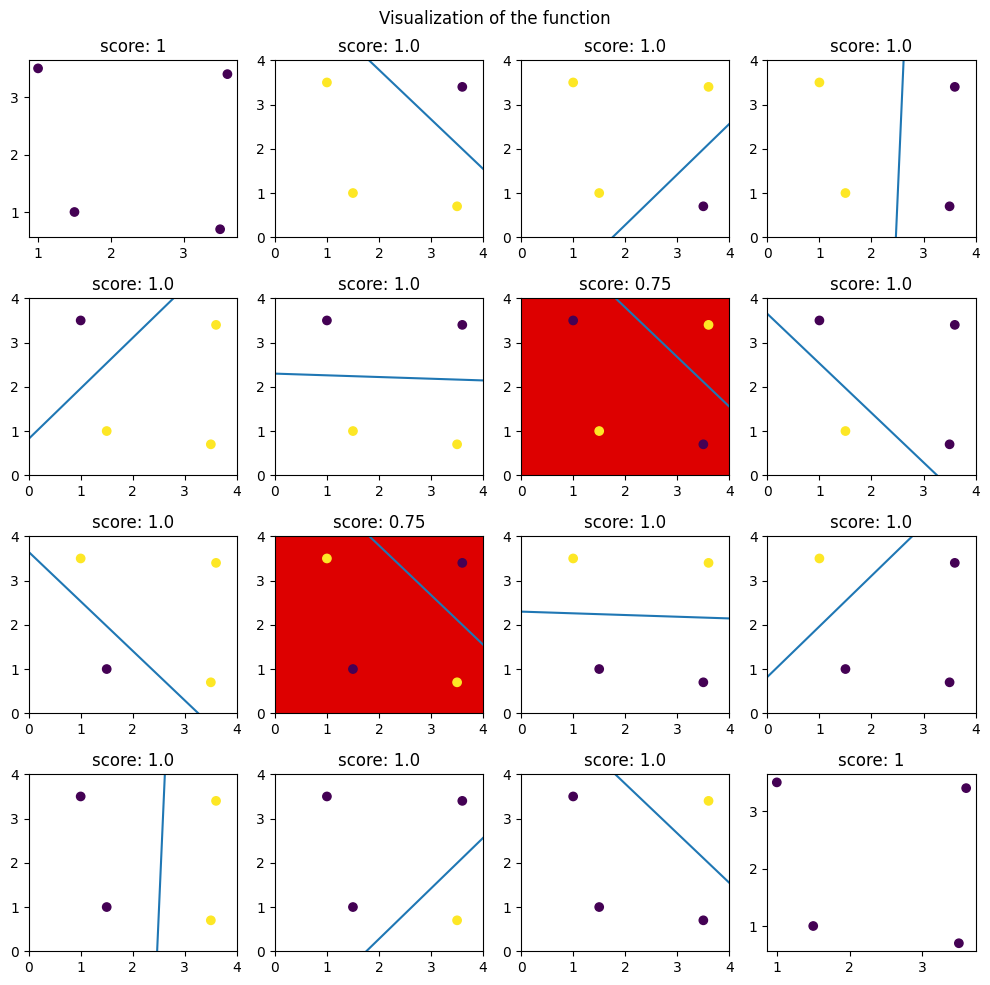

In [59]:
# there should be 2^n = 2^4 = 16 pictures 
# (or 8 if you don't differentiate class swithes, 
# or 8-1=7 if you don't take into account the case in which all observations belongs to one class)
import matplotlib.pyplot as plt
d = 2
n = 4
Sn = np.array([[1.5, 1], [1, 3.5], [3.5, 0.7], [3.6, 3.4]])

fig, ax = plt.subplots(n, n, figsize=(10, 10))


y_combinations = product([1, 0], repeat=n)
for i, y in enumerate(y_combinations):
    
    ax[i//n, i%n].scatter(Sn[:, 0], Sn[:, 1], c=y)

    if np.unique(y).size == 1:
        ax[i//n, i%n].set_title(f"score: 1")
        continue
    svc = SVC(C=10000, shrinking=False, kernel='linear', tol=1e-5)
    svc.fit(Sn, y)
    x = np.linspace(0, 4, 100)
    y_new = -svc.intercept_[0]/svc.coef_[0][1] - svc.coef_[0][0]/svc.coef_[0][1]*x
    ax[i//n, i%n].plot(x, y_new)
    ax[i//n, i%n].set_xlim(0, 4)
    ax[i//n, i%n].set_ylim(0, 4)

    sc = svc.score(Sn, y)
    ax[i//n, i%n].set_title(f"score: {sc}")
    
    if sc != 1:
        ax[i//n, i%n].set_facecolor("#dd0000")

    # ax[i//n, i%n].set_title(f"y: {y}")
plt.suptitle("Visualization of the function")
plt.tight_layout()
plt.show()
        


### d)

In [97]:
# code

N = [i for i in range (1, 13)]
trials = 70
results = []

for d in range(2, 11):
    dim_bound = 0
    for n in N:
        for iter in range(trials):
            S_n = np.random.rand(n, d)
            if is_shattered(d, n, S_n):
                break
            dim_bound = n
        if dim_bound != 0:
            results.append((d, dim_bound))
            break
    print(f"For d = {d} the VC dimension is >= {dim_bound}")

        
        



For d = 2 the VC dimension is >= 4
For d = 3 the VC dimension is >= 5
For d = 4 the VC dimension is >= 6
For d = 5 the VC dimension is >= 7
For d = 6 the VC dimension is >= 8
For d = 7 the VC dimension is >= 9
For d = 8 the VC dimension is >= 10
For d = 9 the VC dimension is >= 11
For d = 10 the VC dimension is >= 12


[]

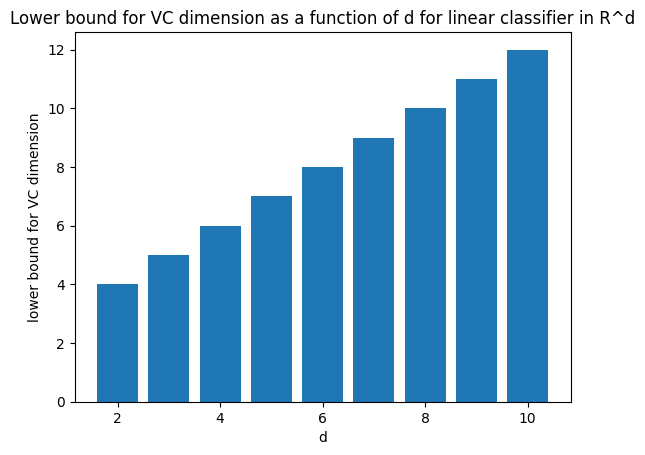

In [98]:
results = np.array(results)
plt.bar(results[:, 0], results[:, 1])
plt.xlabel("d")
plt.ylabel("lower bound for VC dimension")
plt.title("Lower bound for VC dimension as a function of d for linear classifier in R^d")
plt.plot()

### e)

In [90]:
# A hint: change a kernel in SVM

def is_shattered_ball(d, n, S_n, verbose = False):
    # SVC(C=10000, shrinking=False, kernel='radial', tol=1e-5)
    # for y in different assigment of classes to points in S_n:
        # check if they are linearly separable
        # i.e. if we can fit a line so for the points in S_n with classes y the classification error is 0
    
    # if for at least for one y the answer is no, then return False, else return True

    # return True/False
    S_n = np.array(S_n)
    y_combinations = product([1, 0], repeat=n) 
    for y in y_combinations:
        if np.unique(y).size == 1:
            continue
        clf = SVC(C=10000, shrinking=False, kernel='rbf', tol=1e-5)
        clf.fit(S_n, np.array(y))
        if clf.score(S_n, y) != 1:
            if verbose:
                print("Can't separate the following points: ")
                print("y: ", y)
                print("S_n: ", S_n)
            return False
        
    return True


